# Time Series Data (optional lab)

A _time series_ is simply a series of measurements indexed by time. We will discuss strategies for analyzing and visualizing time series data.

# Working with Time Series Data

In this lesson, we will work with [a data set from the National Oceanic & Atmospheric Administration (NOAA)](http://www.esrl.noaa.gov/gmd/ccgg/trends/) consisting of weekly measurements of atmospheric carbon dioxide ($\text{CO}_2$) at the Mauna Loa Observatory in Hawaii, dating back to 1974. Since atmospheric $\text{CO}_2$ is considered to be one of the primary drivers of climate change, this time series is highly relevant to climate policy.

First, let's read in the data set.

In [1]:
import pandas as pd
df_co2 = pd.read_csv("mauna_loa_co2_weekly.csv")
df_co2

,date,ppm,#days
0,1974-05-19,333.34,6
1,1974-05-26,332.95,6
2,1974-06-02,332.32,5
3,1974-06-09,332.18,7
4,1974-06-16,332.37,7
...,...,...,...
2384,2020-01-26,414.09,7
2385,2020-02-02,414.33,7
2386,2020-02-09,414.40,6
2387,2020-02-16,414.01,7


By default, the dates are stored as strings. In order to make `pandas` recognize them as dates, we call `pd.to_datetime`.

In [2]:
pd.to_datetime(df_co2["date"])

0      1974-05-19
1      1974-05-26
2      1974-06-02
3      1974-06-09
4      1974-06-16
          ...    
2384   2020-01-26
2385   2020-02-02
2386   2020-02-09
2387   2020-02-16
2388   2020-02-23
Name: date, Length: 2389, dtype: datetime64[ns]

Notice that the `dtype` of this `Series` is `datetime64[ns]`, which is a special type for storing dates and times. 

In this particular example, `pandas` was able to automatically infer the correct formatting of the dates; however, we can also specify the format explicitly, using the [standard format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [3]:
pd.to_datetime(df_co2["date"], format="%Y-%m-%d")

0      1974-05-19
1      1974-05-26
2      1974-06-02
3      1974-06-09
4      1974-06-16
          ...    
2384   2020-01-26
2385   2020-02-02
2386   2020-02-09
2387   2020-02-16
2388   2020-02-23
Name: date, Length: 2389, dtype: datetime64[ns]

It makes sense to make the date the index of this `DataFrame`.

In [4]:
df_co2.index = pd.to_datetime(df_co2["date"], format="%Y-%m-%d")
df_co2

,date,ppm,#days
date,,,
1974-05-19,1974-05-19,333.34,6
1974-05-26,1974-05-26,332.95,6
1974-06-02,1974-06-02,332.32,5
1974-06-09,1974-06-09,332.18,7
1974-06-16,1974-06-16,332.37,7
...,...,...,...
2020-01-26,2020-01-26,414.09,7
2020-02-02,2020-02-02,414.33,7
2020-02-09,2020-02-09,414.40,6


Another way to achieve (essentially) the same result is to read in the **date** column as the index and to specify that the values should be parsed as dates.

In [6]:
pd.read_csv("mauna_loa_co2_weekly.csv",
            index_col="date",
            parse_dates=True)

,ppm,#days
date,,
1974-05-19,333.34,6
1974-05-26,332.95,6
1974-06-02,332.32,5
1974-06-09,332.18,7
1974-06-16,332.37,7
...,...,...
2020-01-26,414.09,7
2020-02-02,414.33,7
2020-02-09,414.40,6


## Visualizing Time Series

Time series are typically plotted as a line, with time on the $x$-axis and the measurement on the $y$-axis. Since our `DataFrame` is already indexed by time, we can simply select the variable we want to plot (**ppm**, the concentration of $\text{CO}_2$ in parts per million) and call `.plot.line()`.

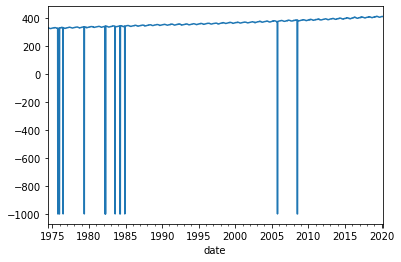

In [7]:
df_co2["ppm"].plot.line()

Oops! It seems that there are some missing values in the data that are coded as $-999.99$.

In [8]:
df_co2[df_co2["ppm"] < 0]["ppm"]

date
1975-10-05   -999.99
1975-12-07   -999.99
1975-12-14   -999.99
1975-12-21   -999.99
1975-12-28   -999.99
1976-06-27   -999.99
1979-05-20   -999.99
1982-03-21   -999.99
1982-04-11   -999.99
1982-04-18   -999.99
1983-08-07   -999.99
1984-04-01   -999.99
1984-04-08   -999.99
1984-04-15   -999.99
1984-04-22   -999.99
1984-12-02   -999.99
2005-10-16   -999.99
2008-06-29   -999.99
2008-07-06   -999.99
2008-07-13   -999.99
Name: ppm, dtype: float64

Let's replace these values with `NaN`s and recreate the plot.

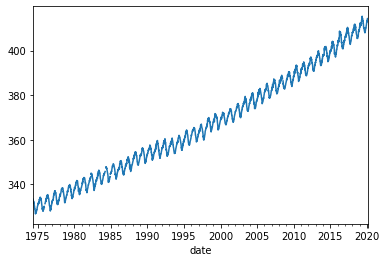

In [9]:
import numpy as np
df_co2 = df_co2.replace(-999.99, np.nan)
ppm = df_co2["ppm"]
ppm.plot.line()

The upward trend in this graph has been cause of great consternation.

Let's take a closer look at what `pandas` did with those missing values that we filtered out. We saw above that measurements were missing for all 4 weeks in December 1975. Let's zoom in on this region by restricting to dates before February 1976. We can compare use logical operators (`<`, `>`, `==`, etc.) to compare dates, except that we have to be sure to compare dates with dates, creating `datetime` objects as necessary.

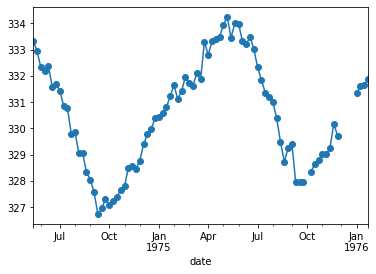

In [10]:
from datetime import datetime

(ppm[ppm.index < datetime(1976, 2, 1)].
 plot.line(style="o-"))

Notice how `pandas` left the appropriate space between the measurement on 1975-11-30 and the next available measurement on 1976-01-04. This is one advantage of casting dates to `datetime`s, rather than simply leaving them as strings. If we had instead made a line plot using the **date** column (which stores the dates as strings), then the values would still have been plotted in the right order, but the points would be uniformly spaced, instead of spaced according to how far apart they are in time.

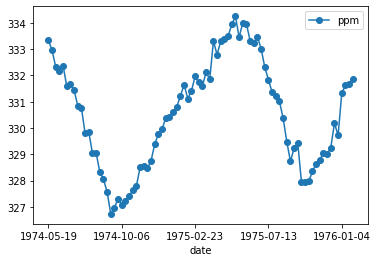

In [11]:
df_co2_no_na = df_co2.dropna()

(df_co2_no_na[df_co2_no_na.index < datetime(1976, 2, 1)].
 plot.line(x="date", y="ppm", style="o-"))

## Changing the Sampling Frequency

From the graph, there is a clear seasonal pattern in $\text{CO}_2$ levels. The levels increase in the winter (in the northern hemisphere), peaking around May of each year, and then decline in the summer. Plants are responsible for this seasonal pattern. In the summer months, plants absorb $\text{CO}_2$ from the atmosphere as part of photosynthesis, in order to grow flowers and leaves. In the winter months, these leaves fall to the ground, where they are broken down by microbes that emit $\text{CO}_2$ in the process. 

However, these seasonal fluctuations are dwarfed by the overall increasing trend, which is thought to be caused by human activities. To see the overall trend more clearly, we can calculate the yearly average, therefore smoothing over all of the seasonal fluctuations. Although this can be done manually, `pandas` provides a convenience method, `.resample()`, that changes the sampling frequency of the time series. The `.resample()` function works like `.groupby()`; you have to specify a column and an aggregation function. In the code below, we average the **ppm** in each year to obtain a time series with a sampling frequency of 1 year.

date
1974-12-31    329.488182
1975-12-31    331.217234
1976-12-31    332.047843
1977-12-31    333.830577
1978-12-31    335.411887
1979-12-31    336.851373
1980-12-31    338.756154
1981-12-31    340.120385
1982-12-31    341.301224
1983-12-31    343.073725
1984-12-31    344.487292
1985-12-31    346.126346
1986-12-31    347.434808
1987-12-31    349.213846
1988-12-31    351.574038
1989-12-31    353.129245
1990-12-31    354.397885
1991-12-31    355.645577
1992-12-31    356.446923
1993-12-31    357.115577
1994-12-31    358.837308
1995-12-31    360.831698
1996-12-31    362.620000
1997-12-31    363.742692
1998-12-31    366.724231
1999-12-31    368.363269
2000-12-31    369.577547
2001-12-31    371.166346
2002-12-31    373.302308
2003-12-31    375.807692
2004-12-31    377.545000
2005-12-31    379.867843
2006-12-31    381.891698
2007-12-31    383.849038
2008-12-31    385.557551
2009-12-31    387.452308
2010-12-31    389.879808
2011-12-31    391.655769
2012-12-31    393.867358
2013-12-31    396.55

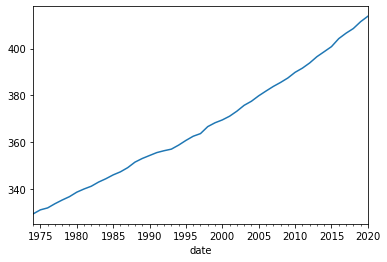

In [12]:
ppm_1y = df_co2.resample("1Y")["ppm"].mean()
ppm_1y.plot.line()
ppm_1y

## Lags and Differences

Another way to remove the effect of seasonality is to take differences. If we take each measurement and subtract the measurement from a year earlier, then any seasonal effect should cancel out, since we are comparing winter measurements to winter measurements and summer measurements to summer measurements.

The easiest way to take this difference is to shift (or _lag_) all of the values in the `DataFrame`. Since each row in our `DataFrame` represents 1 week, we should shift the `DataFrame` by 52 rows so that every value is lined up with its value 1 year ago.

In [13]:
df_co2_lag = df_co2.shift(52)
df_co2_lag

,date,ppm,#days
date,,,
1974-05-19,NaN,NaN,NaN
1974-05-26,NaN,NaN,NaN
1974-06-02,NaN,NaN,NaN
1974-06-09,NaN,NaN,NaN
1974-06-16,NaN,NaN,NaN
...,...,...,...
2020-01-26,2019-01-27,411.02,7.0
2020-02-02,2019-02-03,411.63,7.0
2020-02-09,2019-02-10,412.41,6.0


By comparing the **date** index (which was not shifted) to the **date** column (which was shifted), we see that the values in the `DataFrame` correspond to approximately 1 year earlier than the date in the index. Therefore, if we subtract these lagged **ppm** values from the original **ppm** values, we obtain a `Series` of one-year changes in **ppm**.

date
1974-05-19     NaN
1974-05-26     NaN
1974-06-02     NaN
1974-06-09     NaN
1974-06-16     NaN
              ... 
2020-01-26    3.07
2020-02-02    2.70
2020-02-09    1.99
2020-02-16    3.03
2020-02-23    1.32
Name: ppm, Length: 2389, dtype: float64

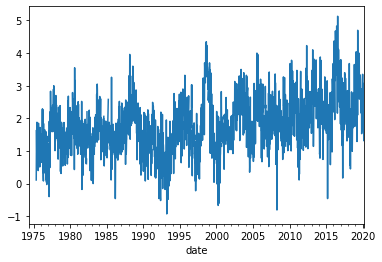

In [14]:
diffs = df_co2["ppm"] - df_co2_lag["ppm"]
diffs.plot.line()
diffs

The seasonality is gone, but so is the trend. The fact that these differences hover around 1.5 tells us that **ppm** has been increasing by about 1.5 ppm per year.

In accounting, these types of metrics are called "Year-over-Year" (YoY) metrics. They are valuable precisely because they eliminate the seasonal effects that are common in many industries (e.g., holiday season for retail businesses).

## Exercises

Exercises 1-2 ask you to work with the Austin weather data set (austin_weather_2019.csv ), which contains hourly measurements of the weather in Austin, TX in 2019. This data set was collected from the [NOAA](https://www.ncdc.noaa.gov/crn/qcdatasets.html). See the [data documentation](https://www1.ncdc.noaa.gov/pub/data/uscrn/products/hourly02/README.txt) for more information.

1\. Read in the data set. Plot the hourly temperature (**T_HR_AVG**) time series as a function of the local date and time (**LST_DATE**, **LST_TIME**).

2\. The hourly temperature plot is extremely noisy. Plot the daily average temperature and weekly average temperature to get a better sense of the climate in Austin, TX.